# Worked Problem #3

## Problem 2.6 (Griffith's): Find the electric field a distance $z$ above the center of a flat circular disk of radius $R$ (Fig. 2.10) that carries a uniform surface charge $\sigma$. What does your formula give in the limit $R \rightarrow \infty$? Also check the cases $z \gg R$ and $R \gg z$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import matplotlib.cm as cm

In [2]:
def electric_field_disk(sigma, R, x_points, y_points):
    k = 8.99e9  # Nm^2/C^2, Coulomb's constant
    
    # Initialize electric field components to zero
    E_x = np.zeros_like(x_points)
    E_y = np.zeros_like(y_points)
    
    # Calculate electric field components due to the charged disk at each point on the grid
    for i in range(x_points.shape[0]):
        for j in range(y_points.shape[1]):
            x = x_points[i, j]
            y = y_points[i, j]
            
            # Calculate the distance from the point (x, y) to the center of the disk (0, 0)
            r = np.sqrt(x**2 + y**2)
            
            # Check if the point is inside the disk
            if r <= R:
                # Calculate the electric field components due to an infinitesimal charge element on the disk
                dE = k * sigma * (x / r**3), k * sigma * (y / r**3)
                
                # Add the contribution from this charge element to the total electric field
                E_x[i, j] = dE[0]
                E_y[i, j] = dE[1]
    
    return E_x, E_y

In [8]:
def plot_electric_field(X, Y, E_x, E_y, stream_color='b'):
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    
    # First Subplot - Quiver Plot
    axs[0].quiver(X, Y, E_x, E_y, scale=1e6, color='r')
    axs[0].set_title('Quiver Plot')
    axs[0].set_xlabel('x [m]')
    axs[0].set_ylabel('y [m]')
    axs[0].axhline(0, color='black', linewidth=0.5)
    axs[0].axvline(0, color='black', linewidth=0.5)
    axs[0].grid(color='gray', linestyle='--', linewidth=0.5)
    
    # Second Subplot - Stream Plot
    axs[1].streamplot(X, Y, E_x, E_y, color=stream_color, linewidth=1, density=2, arrowstyle='->', arrowsize=1.5)
    axs[1].set_title('Stream Plot')
    axs[1].set_xlabel('x [m]')
    axs[1].set_ylabel('y [m]')
    axs[1].axhline(0, color='black', linewidth=0.5)
    axs[1].axvline(0, color='black', linewidth=0.5)
    axs[1].grid(color='gray', linestyle='--', linewidth=0.5)
    
    # Third Subplot - Color Scaled Quiver Plot
    magnitude = np.sqrt(E_x**2 + E_y**2)
    colors = np.log(magnitude)
    strm = axs[2].streamplot(X, Y, E_x, E_y, color=colors, cmap = cm.inferno)
    axs[2].set_title('Color Scaled Stream Plot')
    axs[2].set_xlabel('x [m]')
    axs[2].set_ylabel('y [m]')
    axs[2].axhline(0, color='black', linewidth=0.5)
    axs[2].axvline(0, color='black', linewidth=0.5)
    axs[2].grid(color='gray', linestyle='--', linewidth=0.5)
    # Add a colorbar to the plot
    cbar = plt.colorbar(strm.lines)
    cbar.set_label(r'$\log{\left|\mathbf{E}\right|}$')

    
    plt.tight_layout()  # Adjust spacing between subplots
    plt.show()

C:\Users\cesay\AppData\Local\Temp\ipykernel_26236\610117050.py:24: RuntimeWarning: divide by zero encountered in log
  colors = np.log(magnitude)


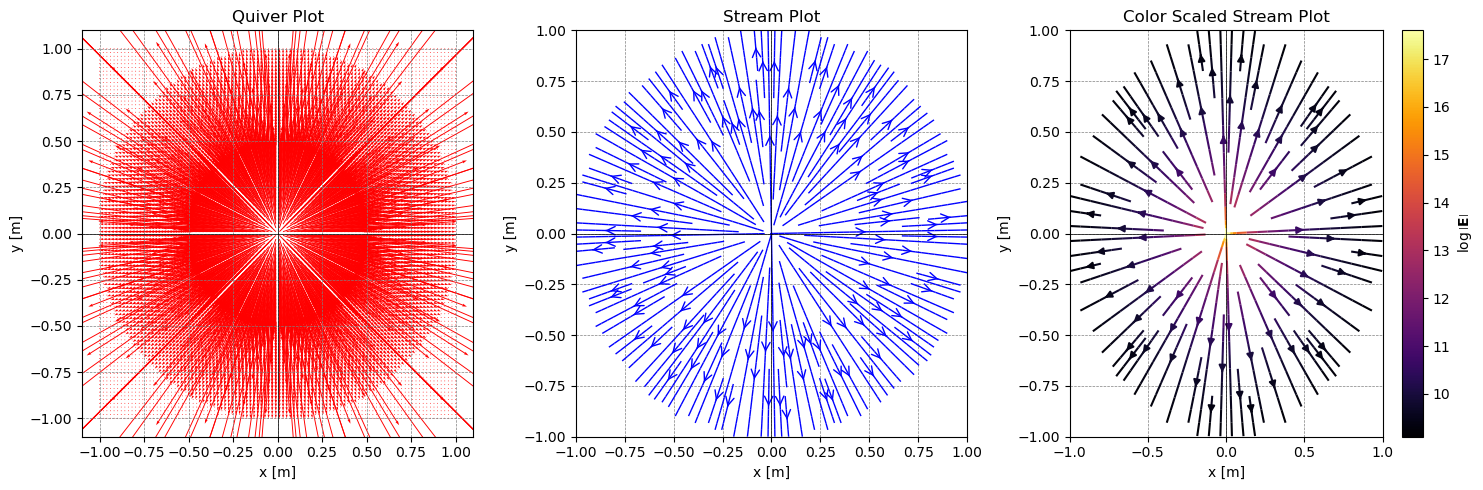

In [9]:
# Set Grid of Points
x = np.linspace(-1, 1, 100)  # Adjust the range and resolution as needed
y = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(x, y)

# Surface charge density and radius of the disk
sigma = 1e-6  # C/m^2
R = 1  # Radius of the circular disk in meters

# Calculate electric field components
E_x, E_y = electric_field_disk(sigma, R, X, Y)

# Plot the electric field
plot_electric_field(X, Y, E_x, E_y)